<a href="https://colab.research.google.com/github/M-d-t-spec/FUTURE_DS_03/blob/main/College_event_feedback_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving college_event_feedback.csv to college_event_feedback.csv


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("college_event_feedback.csv")

# Show first 5 rows
df.head()

,Event_Name,Overall_Rating,Organization,Speaker_Quality,Venue,Attend_Again,Liked_Most,Improvements,Additional_Comments
0,Tech Innovation Talk,5,Excellent,Excellent,Good,Yes,The speaker was very inspiring and knowledgeable,More time for Q&A,Great event overall
1,Career Fair,4,Good,Good,Average,Yes,Good networking opportunities,Better organization of booths,Crowded but useful
2,Leadership Workshop,3,Average,Good,Average,Maybe,Interactive activities,Session felt too long,Could be more engaging
3,AI Seminar,5,Excellent,Excellent,Excellent,Yes,Very informative and well organized,Nothing much,Loved the practical examples
4,Entrepreneurship Panel,2,Poor,Average,Poor,No,Panelists were honest,Poor time management,Event started late


In [ ]:
# Check column types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event_Name           14 non-null     object
 1   Overall_Rating       14 non-null     int64 
 2   Organization         14 non-null     object
 3   Speaker_Quality      14 non-null     object
 4   Venue                14 non-null     object
 5   Attend_Again         14 non-null     object
 6   Liked_Most           14 non-null     object
 7   Improvements         14 non-null     object
 8   Additional_Comments  14 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.1+ KB


In [ ]:
# Check shape (rows, columns)
df.shape

(14, 9)

In [ ]:
# Quick stats for numeric columns
df.describe()

,Overall_Rating
count,14.000000
mean,3.857143
std,1.099450
min,2.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


from matplotlib import pyplot as plt
_df_0['Overall_Rating'].plot(kind='hist', bins=20, title='Overall_Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Overall_Rating'].plot(kind='line', figsize=(8, 4), title='Overall_Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Overall_Rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.isnull().sum()

,0
Event_Name,0
Overall_Rating,0
Organization,0
Speaker_Quality,0
Venue,0
Attend_Again,0
Liked_Most,0
Improvements,0
Additional_Comments,0


In [ ]:
# Fill missing text
text_cols = ['Liked_Most','Improvements','Additional_Comments']
df[text_cols] = df[text_cols].fillna("No Response")

In [ ]:
# Convert Overall_Rating to numeric (just in case)
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

In [ ]:
cat_cols = ['Organization','Speaker_Quality','Venue','Attend_Again']
for col in cat_cols:
    df[col] = df[col].str.strip().str.title()

In [ ]:
text_cols = ['Liked_Most','Improvements','Additional_Comments']

# Lowercase everything
for col in text_cols:
    df[col] = df[col].str.lower()

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event_Name           14 non-null     object
 1   Overall_Rating       14 non-null     int64 
 2   Organization         14 non-null     object
 3   Speaker_Quality      14 non-null     object
 4   Venue                14 non-null     object
 5   Attend_Again         14 non-null     object
 6   Liked_Most           14 non-null     object
 7   Improvements         14 non-null     object
 8   Additional_Comments  14 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.1+ KB


count    14.000000
mean      3.857143
std       1.099450
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Overall_Rating, dtype: float64


/tmp/ipython-input-3146497514.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall_Rating', data=df, palette='coolwarm')


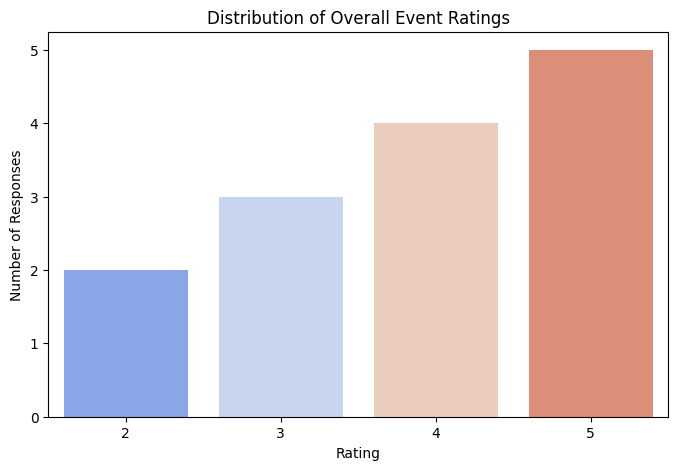

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(df['Overall_Rating'].describe())

# Histogram of ratings
plt.figure(figsize=(8,5))
sns.countplot(x='Overall_Rating', data=df, palette='coolwarm')
plt.title('Distribution of Overall Event Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Responses')
plt.show()

/tmp/ipython-input-3710103894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Organization', data=df, palette='viridis', order=df['Organization'].value_counts().index)


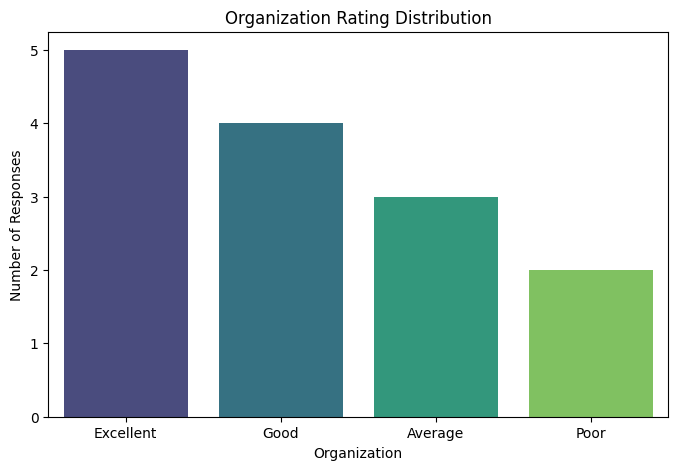

In [ ]:
# Plot Organization ratings
plt.figure(figsize=(8,5))
sns.countplot(x='Organization', data=df, palette='viridis', order=df['Organization'].value_counts().index)
plt.title('Organization Rating Distribution')
plt.xlabel('Organization')
plt.ylabel('Number of Responses')
plt.show()

/tmp/ipython-input-167087642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


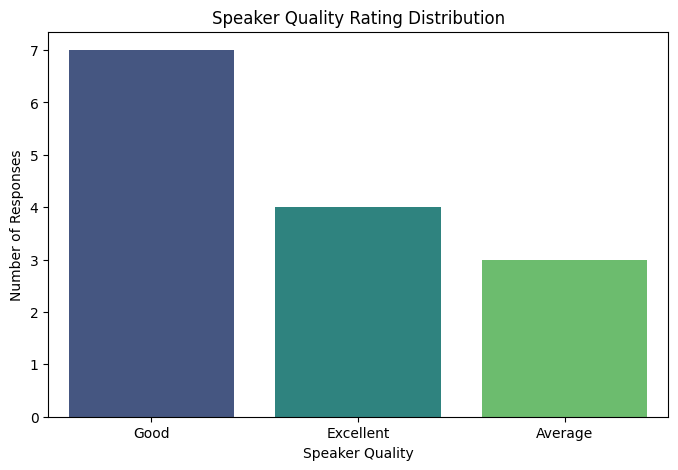

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Speaker_Quality',
    data=df,
    palette='viridis',
    order=df['Speaker_Quality'].value_counts().index
)
plt.title('Speaker Quality Rating Distribution')
plt.xlabel('Speaker Quality')
plt.ylabel('Number of Responses')
plt.show()

/tmp/ipython-input-2646132198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


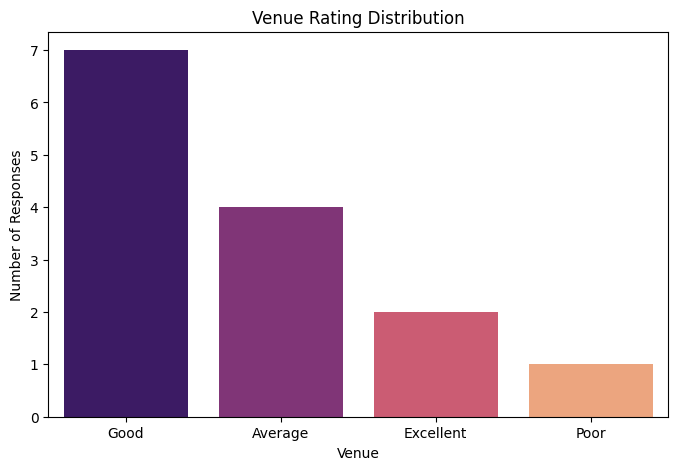

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Venue',
    data=df,
    palette='magma',
    order=df['Venue'].value_counts().index
)
plt.title('Venue Rating Distribution')
plt.xlabel('Venue')
plt.ylabel('Number of Responses')
plt.show()

/tmp/ipython-input-3115051093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


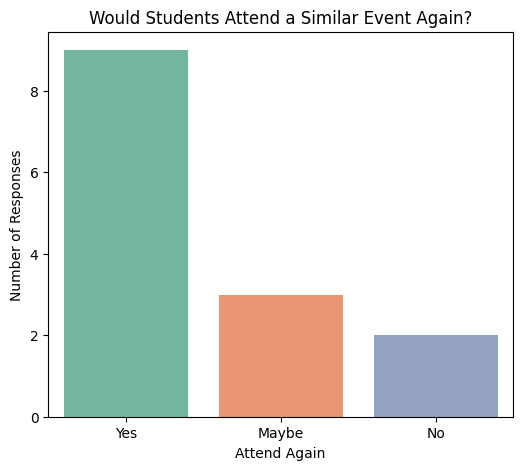

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(
    x='Attend_Again',
    data=df,
    palette='Set2',
    order=df['Attend_Again'].value_counts().index
)
plt.title('Would Students Attend a Similar Event Again?')
plt.xlabel('Attend Again')
plt.ylabel('Number of Responses')
plt.show()

/tmp/ipython-input-1307200170.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


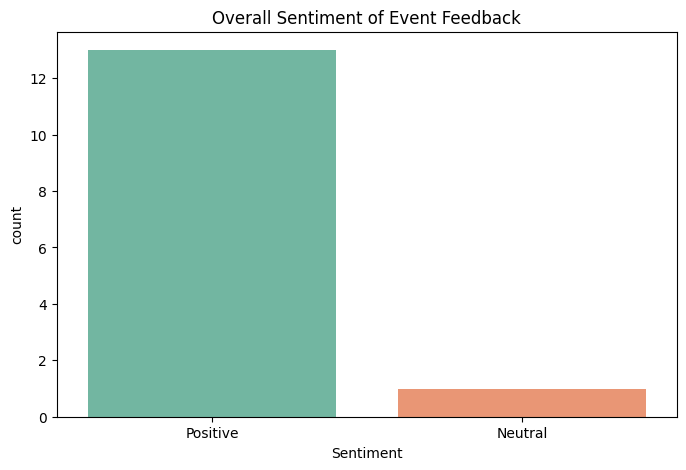

In [ ]:
from textblob import TextBlob

# Combine all text columns into one for sentiment
df['All_Text'] = df['Liked_Most'] + ". " + df['Improvements'] + ". " + df['Additional_Comments']

# Create a sentiment score
df['Sentiment_Polarity'] = df['All_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
def sentiment_label(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Sentiment_Polarity'].apply(sentiment_label)

# Plot sentiment
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Overall Sentiment of Event Feedback')
plt.show()

/tmp/ipython-input-3952418977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overall_Rating', y='Event_Name', data=df.sort_values('Overall_Rating', ascending=False), palette='coolwarm')


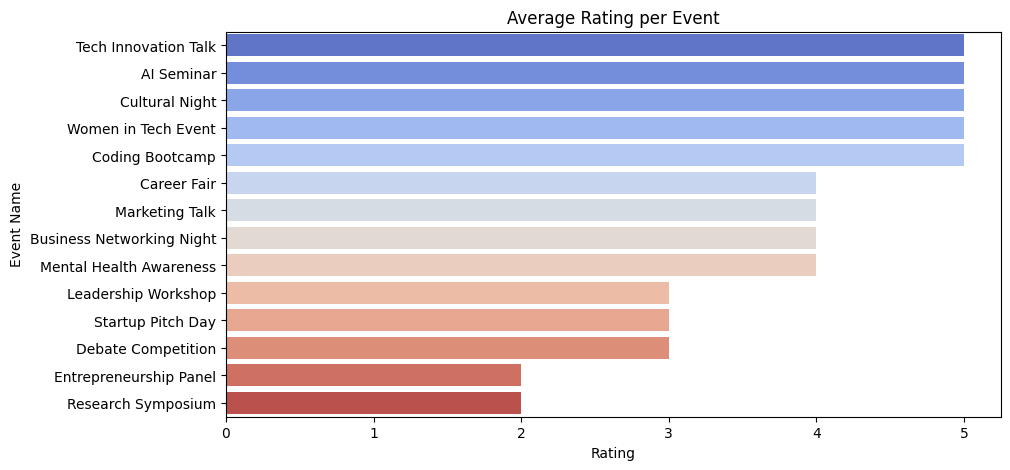

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Overall_Rating', y='Event_Name', data=df.sort_values('Overall_Rating', ascending=False), palette='coolwarm')
plt.title('Average Rating per Event')
plt.xlabel('Rating')
plt.ylabel('Event Name')
plt.show()

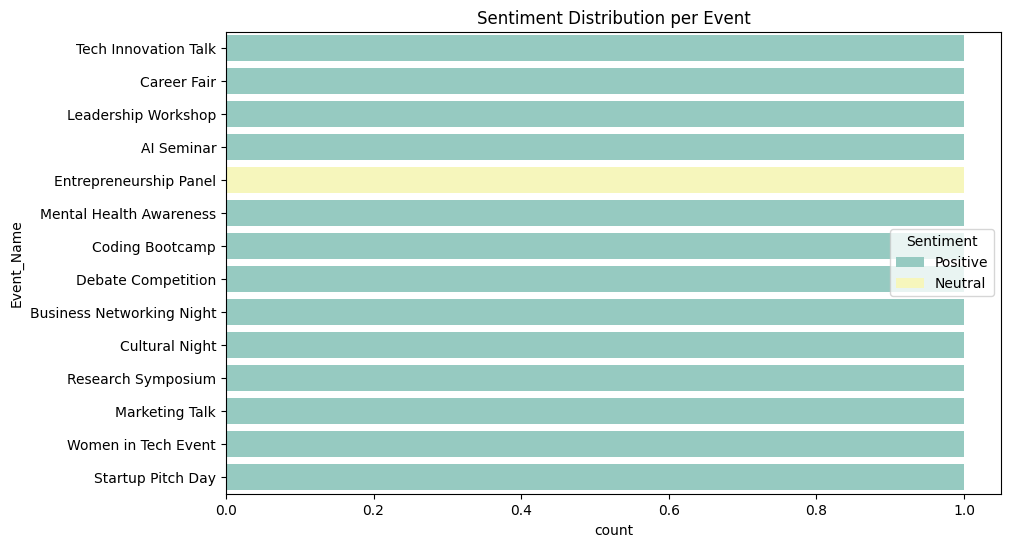

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Event_Name', hue='Sentiment', data=df, palette='Set3')
plt.title('Sentiment Distribution per Event')
plt.show()